In [1]:
import os

os.chdir("..")
import model
from model.utils import common_params

os.chdir("analyze")

from typing import Dict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

GOV to do!


In [2]:
plt.style.use("dark_background")
plt.rc("grid", alpha=0.3)

In [3]:
lines = []
cp = model.utils.common_params.copy()

In [4]:
class Society_car_prices(model.SocietyConstantsEnergyPrices):
    def _get_annual_cost(
        self, customer: model.Customer, year: int, month: int
    ) -> Dict[model.CarTypes, float]:
        val = super()._get_annual_cost(customer, year, month)
        lines.append(val)
        return val

In [5]:
MC = 100
# cp["kwargs"]["energy_price"] = 6
# cp["kwargs"]["fuel_price"] = 600
cp["kwargs"]["car_price_noise"] = lambda: 0
cp["kwargs"]["corporation_technological_progress"] = 0.005
# N = 100
T = cp["T"]
# get_full_path = lambda x: os.sep.join(["..", "data", x])
# energy_prices = get_full_path("energy_price.csv")
# fuel_prices = get_full_path("fuel_price.csv")
# nerby_radius = 10
# city_size = (500, 500)
# alpha = 0.01
# corporation_margin = 0.2
# corporation_technological_progress = 0.0004
# initial_public_chargers = 100
# initial_time = (2015, 1)

In [6]:
cp

{'T': 100,
 'kwargs': {'alpha': 0.01,
  'car_price_noise': <function __main__.<lambda>()>,
  'city_size': (54, 54),
  'corporation_margin': 0.2,
  'corporation_technological_progress': 0.005,
  'energy_price': 600,
  'energy_factor': 1,
  'fuel_price': 6,
  'government': <model.Government.GovernmentBuildChargingStation at 0x7f7794bb1fd0>,
  'initial_public_chargers': 6,
  'initial_time': (2015, 1),
  'nerby_radius': 10,
  'population': 3000}}

In [7]:
soc = Society_car_prices(**cp["kwargs"])
soc.run(T)

In [8]:
max([line["EV"] for line in lines])

19918.76

<Axes: >

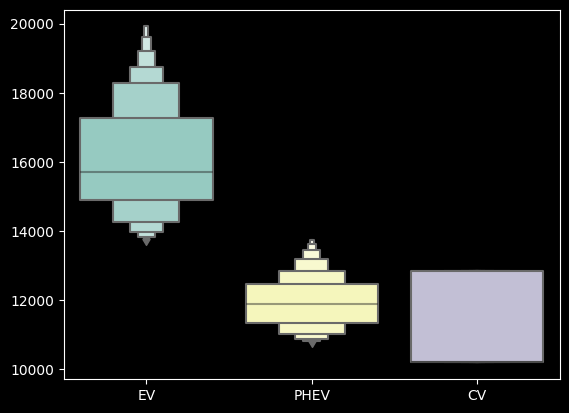

In [9]:
sns.boxenplot(pd.DataFrame(lines))

In [10]:
soc.corporations.car_costs

{'CV': 126900.0, 'EV': 132493.2, 'PHEV': 129696.6}